# 信号処理入門

畳み込み、正弦波、フーリエ変換の基本を学びます。

## 時間領域の信号

まず、時間領域の信号に取り組みます。 これは、時間的に一定の間隔で信号を測定する必要があります。 信号を測定する頻度をサンプリング周波数といいます。 サンプリング周波数の単位は、一般的に$Hz$、つまり1秒あたりのサイクル数で表されます。サンプリング周波数は、時系列の測定全体にわたって一定であることが重要である。

### 内積(ドットプロダクト)

畳み込みを理解するためには、まず内積(ドットプロダクト)に慣れる必要があります。 内積とは、あるベクトルの要素を別のベクトルの要素で重み付けした和のことである。この方法は信号処理でよく使われ、また統計学でも2つのベクトルの類似性を測る尺度として使われています。最後に、幾何学的な解釈として、ベクトル間のマッピング（すなわち、2つのベクトルの大きさの積を、それらの間の角度の余弦でスケーリングしたもの）もある。

$dotproduct_{ab}=\sum_{i=1}^n a_i b_i$.

乱数のベクトルをいくつか作って、ドットプロダクトの働きを見てみましょう。 まず、2つのベクトルは同じ長さである必要があります。

Dot Product: 499


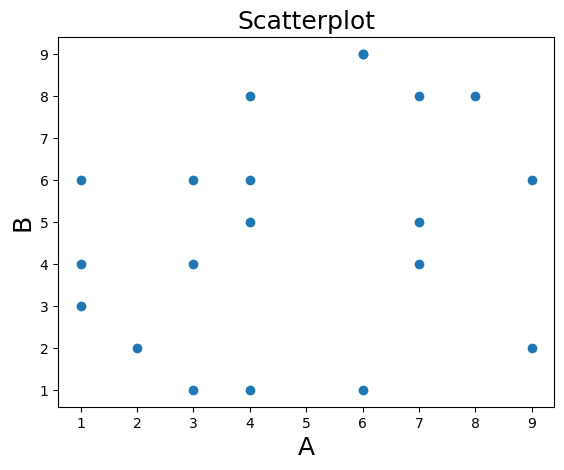

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,10,20)
b = np.random.randint(1,10,20)

plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print('Dot Product: %s' % np.dot(a,b))

2つの変数をより類似させるとどうなるのでしょうか？ 次の例では、ベクトルの1つにガウスノイズを加えてみます。 ドットプロダクトはどうなるでしょうか？

Dot Product: 595.7348800066696


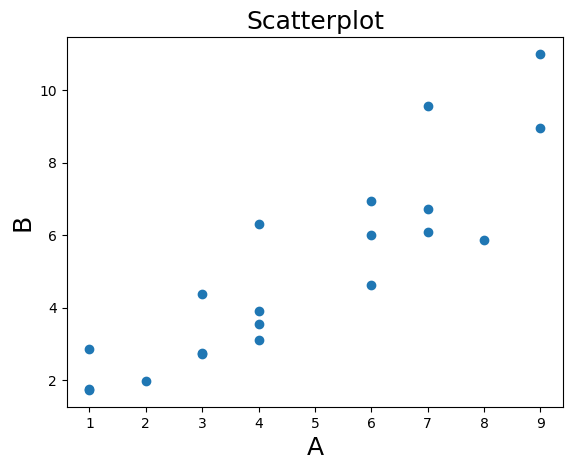

In [2]:
b = a + np.random.randn(20)
plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print(f'Dot Product: {np.dot(a,b)}')

### 畳み込み

時間領域での畳み込みは、ドットプロダクトを拡張したもので、ドットプロダクトを時間的に反復して計算する。 一つの考え方として、一方の信号が他方の信号の各時点を重み付けし、時間をかけて前方にスライドさせるというものです。 時系列変数を*signal*、もう一方のベクトルを*kernel*と呼ぶことにしましょう。重要なのは、今回の目的では、カーネルはほとんど常にシグナルより小さくなることです。そうでなければ、後にスカラー値が1つしか残らないからです。

コンボリューションがどのように機能するかを理解するために、いくつかのデータで遊んでみましょう。まず、スパイクの時系列を作成します。そして、この信号をボックスカーカーネルで畳み込みます。

Text(0.5, 1.0, 'Kernel ')

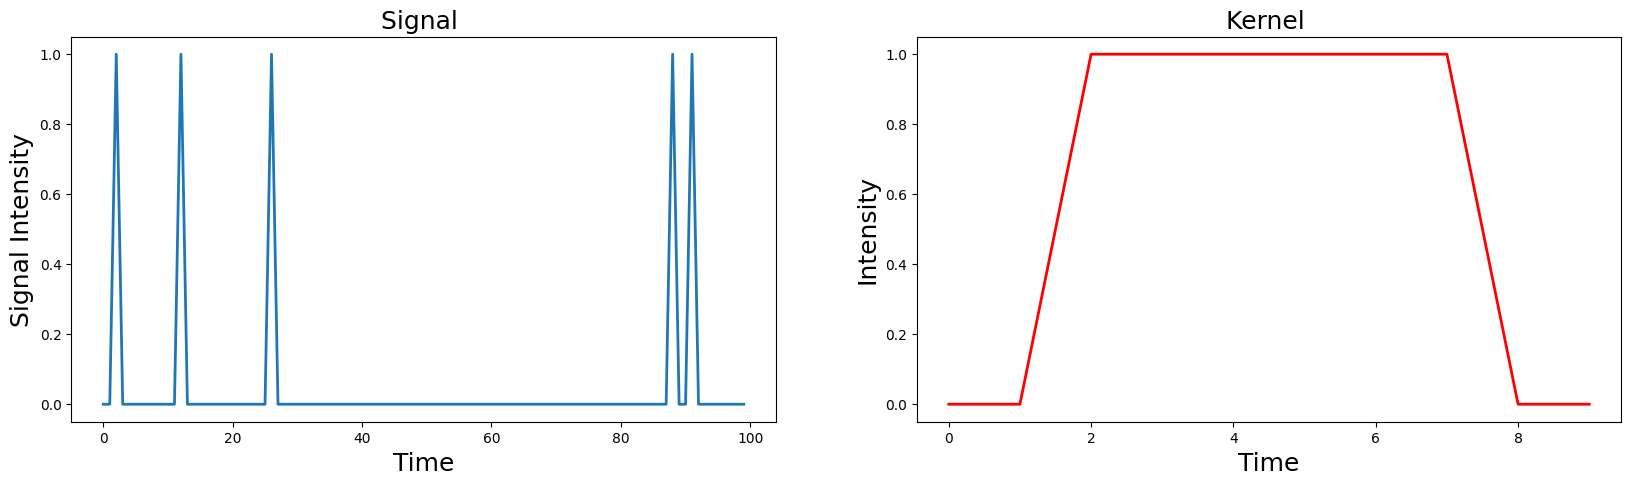

In [3]:
n_samples = 100

# spike signal
signal = np.zeros(n_samples)
signal[np.random.randint(0 ,n_samples, 5)] = 1


kernel = np.zeros(10)
kernel[2:8] = 1

f,a = plt.subplots(ncols=2, figsize=(20,5))
a[0].plot(signal, linewidth=2)
a[0].set_xlabel('Time', fontsize=18)
a[0].set_ylabel('Signal Intensity', fontsize=18)
a[0].set_title('Signal ', fontsize=18)
a[1].plot(kernel, linewidth=2, color='red')
a[1].set_xlabel('Time', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Kernel ', fontsize=18)

信号の長さが 100 サンプルで 5 つの単一パルスがあるのに対し、カーネルの長さはわずか 10 サンプルで、ボックスカー幅は約 6 秒であることに注目してください。

次に、信号の各時点とカーネルの内積を取得することにより、信号をカーネルと畳み込みましょう。 これは、信号の各時点でシフトされたカーネルの行列を作成することで説明できます。

ヒートマップを使用して、色の変化が強度を反映していることを示します。これは単に有蓋車のカーネルを移動させているだけであり、各サンプルの継続時間は 6 秒です。

Text(0.5, 1.0, 'Time Shifted Kernels')

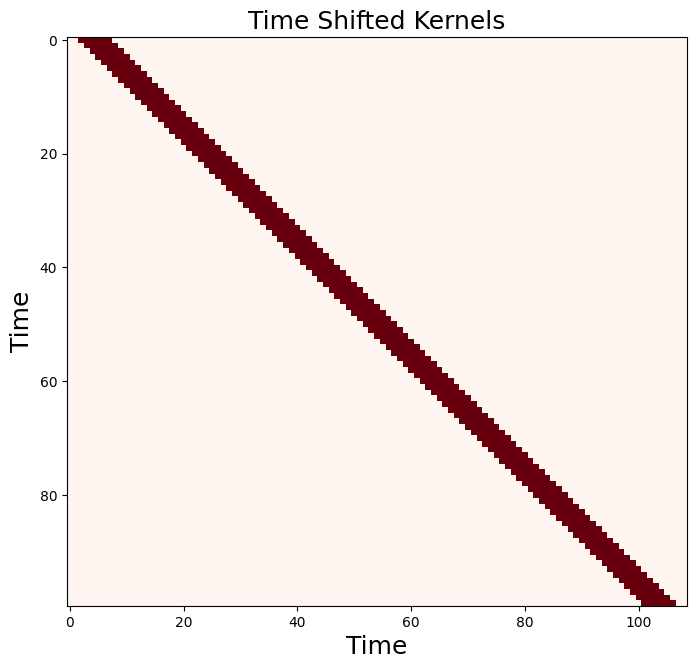

In [4]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel) - 1))
for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = kernel

plt.figure(figsize=(8, 8))
plt.imshow(shifted_kernel, cmap='Reds')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title('Time Shifted Kernels', fontsize=18)

次に、この行列を使用して信号の内積を計算してみましょう。

基本的な線形代数の記憶をリフレッシュします。 行列の乗算は、この拡張されたカーネル行列の各行と信号ベクトルのドット積を求めることで構成されます。

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

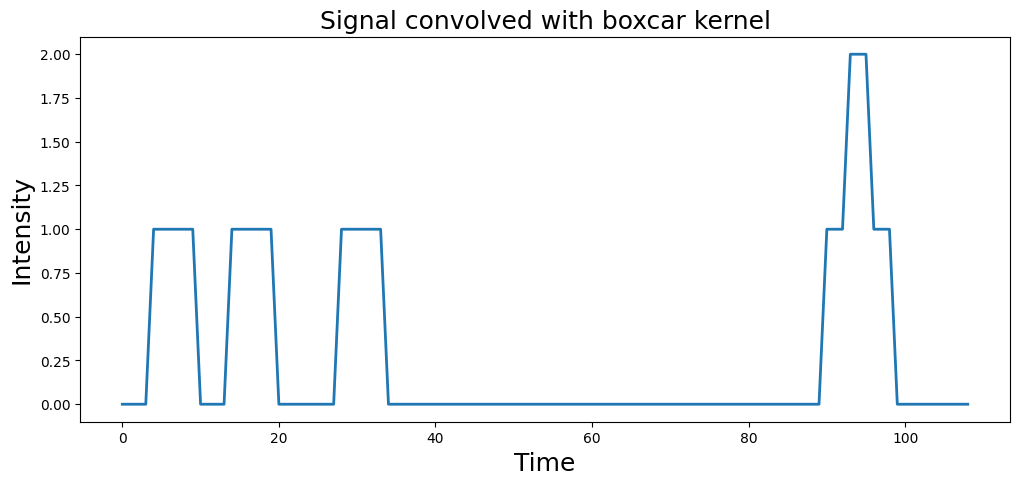

In [5]:
convolved_signal = np.dot(signal, shifted_kernel)

plt.figure(figsize=(12, 5))
plt.plot(convolved_signal, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

畳み込み後、各スパイクがカーネルの形状になっていることがわかります。 ボックスが重なると、時間的に近いスパイクが増加します。

最終的な信号の形状が、信号とカーネルを組み合わせた長さから 1 を引いたものになることにも注目してください。

In [6]:
print(f"Signal Length: {len(signal)}")
print(f"Kernel Length: {len(kernel)}")
print(f"Convolved Signal Length: {len(convolved_signal)}")

Signal Length: 100
Kernel Length: 10
Convolved Signal Length: 109


信号の各時点でカーネルのドット積を繰り返し取得し、すべての値を合計するこのプロセスは、numpy `np.convolve` の畳み込み関数を使用して実行できます。

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

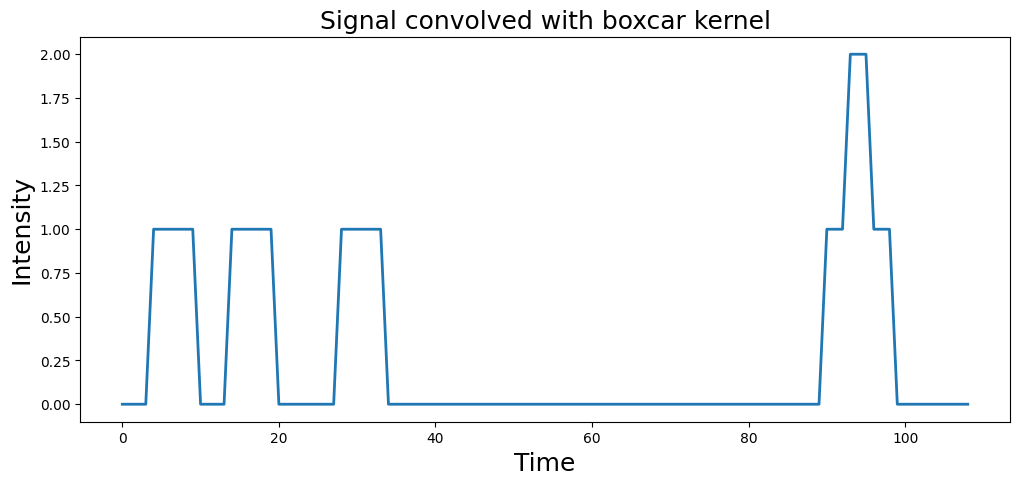

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(np.convolve(signal, kernel), linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

スパイクの強度が異なり、高さが異なるとどうなるでしょうか?

Text(0.5, 0, 'Time')

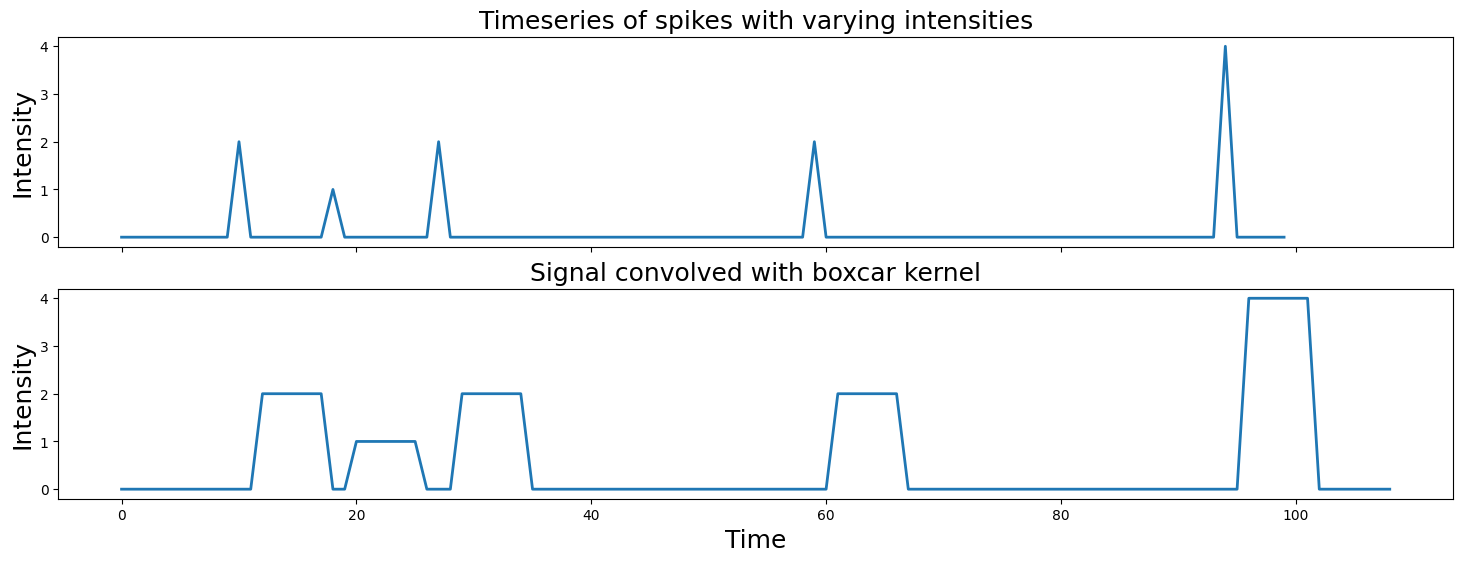

In [8]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].plot(np.convolve(signal, kernel), linewidth=2)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Signal convolved with boxcar kernel', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)

さて、カーネルを、より興味深い形状のもの、たとえば血行動態応答関数に置き換えるとどうなるでしょうか?

ここでは、Gary Glover によって開発されたダブル ガンマ血行動態関数 (HRF) を使用します。

**注意**: nltools をまだインストールしていない場合は、「!pip install nltools」を実行します。 jupyter カーネルも再起動する必要がある場合があります。

Text(0.5, 1.0, 'Hemodynamic Response Function')

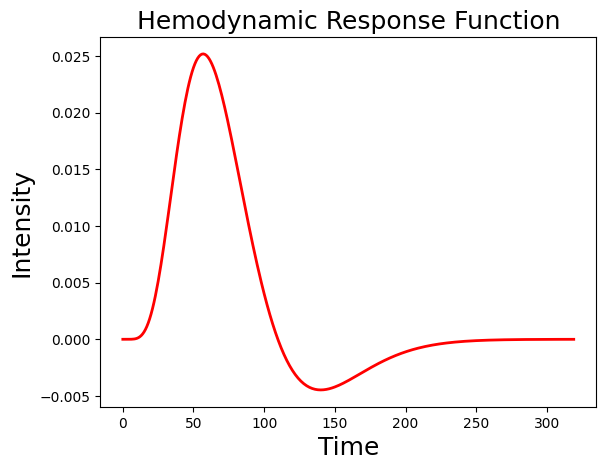

In [9]:
from nltools.external import glover_hrf

tr = 2
hrf = glover_hrf(tr, oversampling=20)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)


この例では、関数をよりスムーズにするためにオーバーサンプリングしました。 実際には、サンプリング解像度を考慮してカーネルが正しい形状であることを確認する必要があります。 オーバーサンプリングを 1 に設定してください。関数がよりぎざぎざに見えることに気づきましたか?

Text(0.5, 1.0, 'Hemodynamic Response Function')

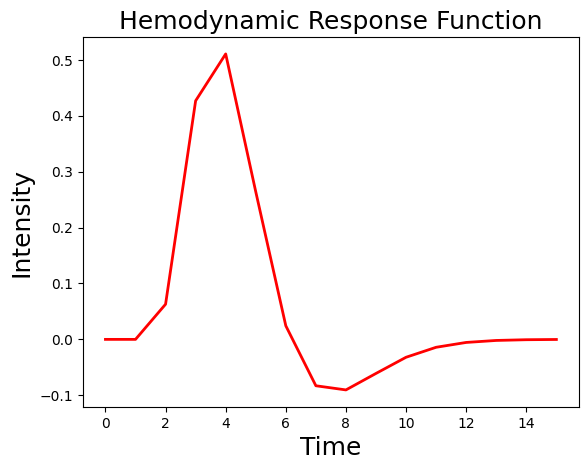

In [11]:
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)


次に、この HRF カーネルを使用してイベント パルスを畳み込んでみましょう。

Text(0.5, 1.0, 'Signal convolved with HRF kernel')

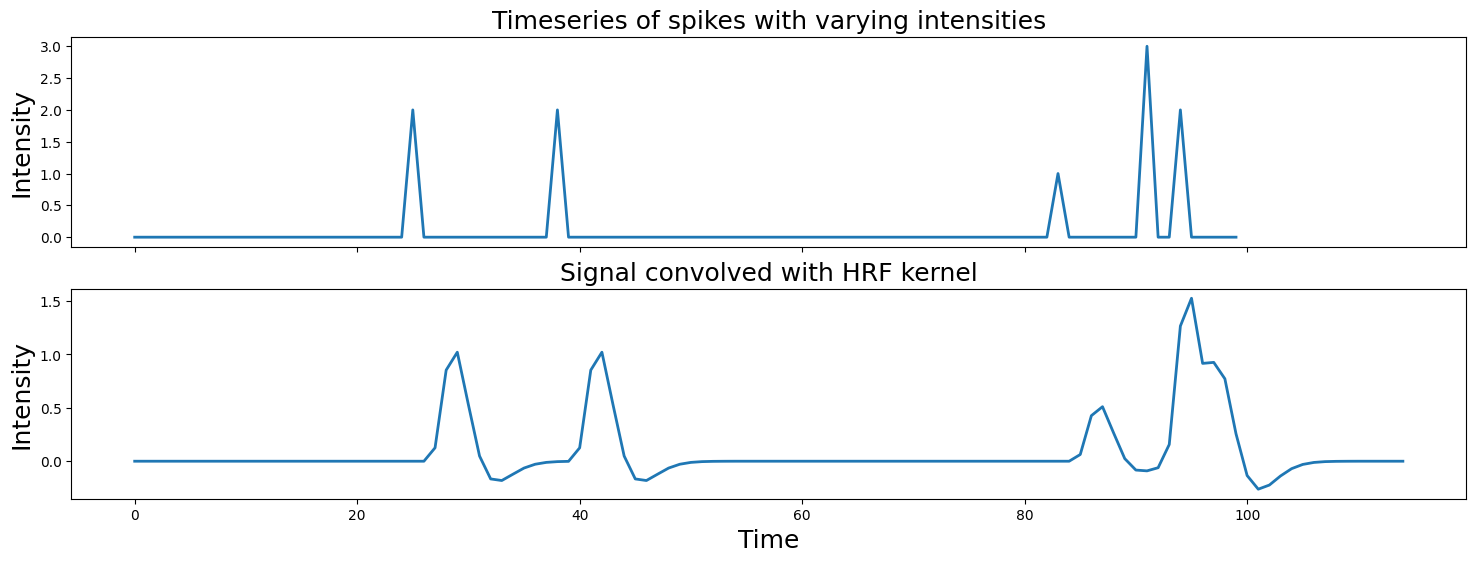

In [12]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[1].plot(np.convolve(signal, hrf), linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)
a[1].set_title('Signal convolved with HRF kernel', fontsize=18)


### 振動

さて、振動波の形状を持つ時間変化信号の研究に移りましょう。

振動は数学的に次のように説明できます。

$A\sin(2 \pi ft + \theta)$

ここで、$f$ は、1 秒あたりのサイクル数 - $Hz$ で表される振動の周波数または速度です。 振幅 $A$ は波の高さを指し、山から谷までの距離の半分です。 最後に、$\theta$ は位相角オフセットをラジアン単位で表します。

ここでは単純な正弦波をプロットします。 さまざまなパラメーター (振幅、周波数、シータなど) を試して、それぞれが波の形状にどのような影響を与えるかを直感的に理解してください。

In [ ]:
from numpy import sin, pi, arange

sampling_freq = 500
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 5
freq = 5
theta = 0

simulation = amplitude * sin(2 * pi * freq * time + theta)

plt.figure(figsize=(12, 5))
plt.plot(time, simulation, linewidth=2)
plt.title('Sine Wave', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

インタラクティブなウィジェットを使用して、さまざまなパラメーターの影響を確認することもできます。 ここでスライダを移動して、正弦波の振幅、周波数、θパラメータを変更した場合の影響を確認できます。 右側のパネルには、正弦波の複雑な成分も表示されています。

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [14]:
from ipywidgets import interact, FloatSlider
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

<function __main__.plot_oscillation(amplitude=5, frequency=5, theta=1)>

次に、異なる周波数で発振する複数の正弦波を組み合わせたシミュレーションを生成します。

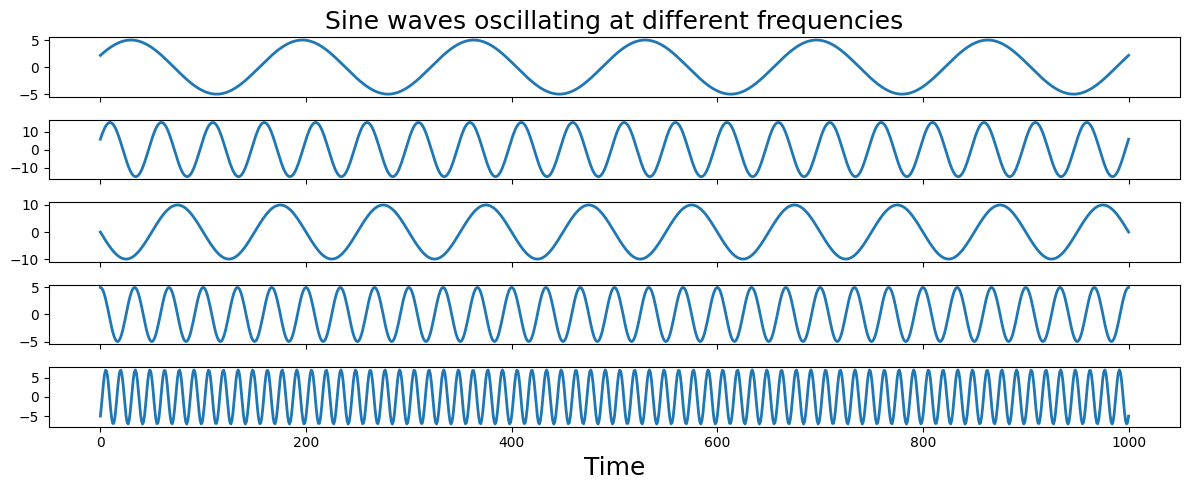

In [15]:
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    

これらの信号をすべて加算して、より複雑な信号を取得しましょう。

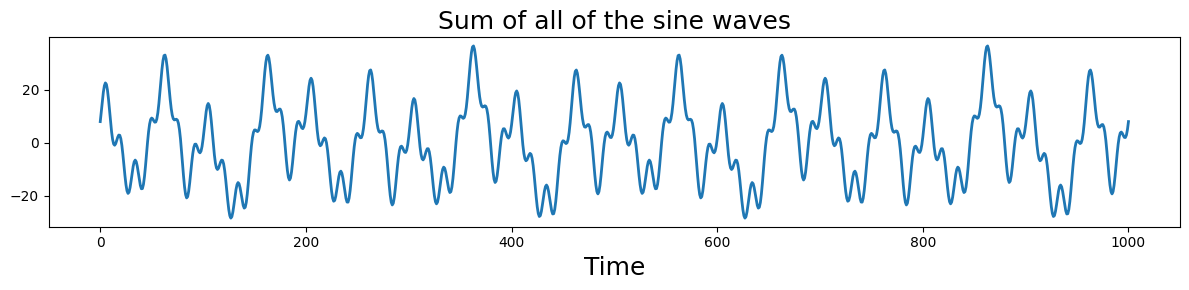

In [16]:
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

サンプリング周波数を変更すると、これらの振動を測定する能力にどのような影響があるでしょうか? 非常に低い値 (たとえば、70 Hz 未満) に下げてみてください。サンプリング周波数が信号のナイキスト周波数を下回ると、信号がエイリアスになることに注意してください。 振動を観察するには、各振動サイクルで少なくとも 2 回サンプリングする必要があります。 これにより、データの表示がギザギザになりますが、それでも理論的には周波数を観察できます。 実際には、サンプリング レートが高いほど、基礎となる信号をよりよく観察できるようになります。

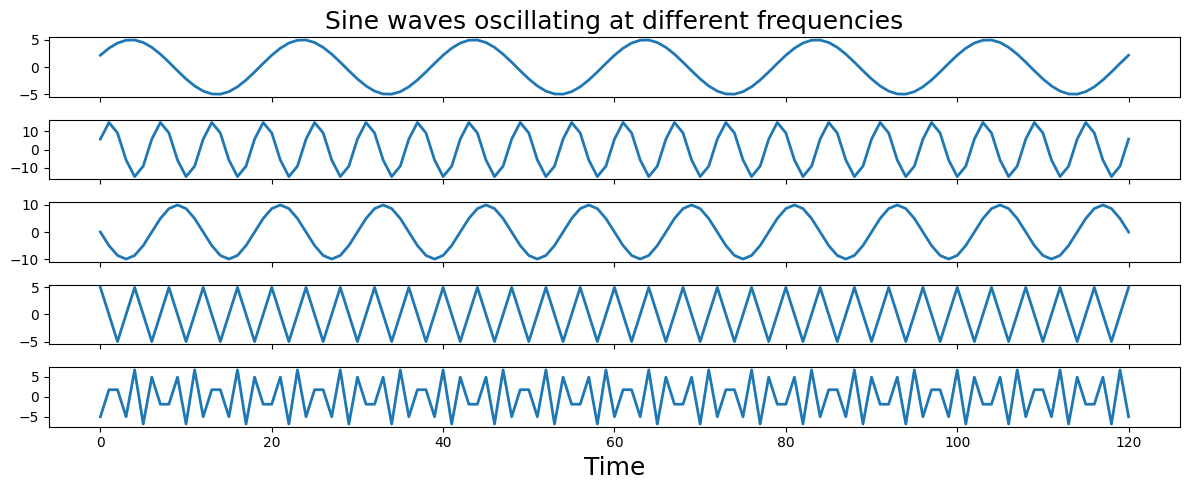

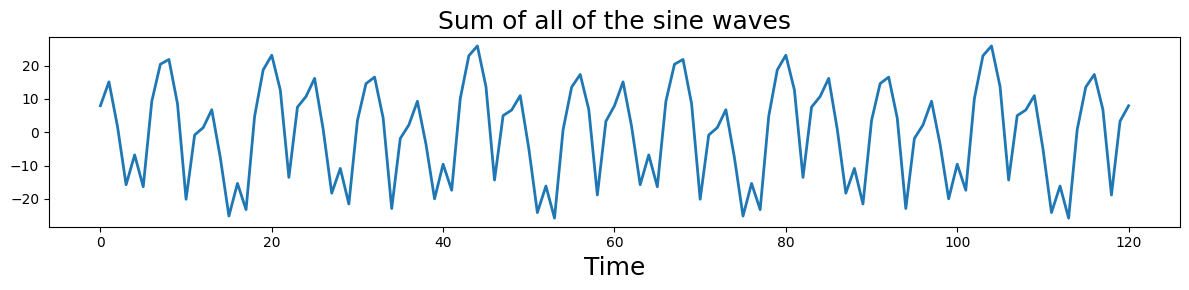

In [17]:
sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    


ナイキスト周波数を超える周波数のギザギザの線に気づきましたか? それは、振動を正確に観察するのに十分なサンプルがないためです。


さて、サンプリング周波数を上げてエイリアシングを除去しましょう。 この信号に少しのガウス (ホワイト) ノイズを追加して、さらにリアルにすることができます。 ノイズのスケーリングを調整して、ノイズの量を変えてみます。

In [ ]:
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

## 時間および周波数ドメイン
上記では時間領域で信号を表現する方法を見てきました。 ただし、これらの信号は周波数領域でも表すことができます。

まずは、これらの異なるドメインの両方で信号がどのように表現されるかの概要を理解しましょう。

以降、基本的に信号処理の確認なので、英語で取り組んでも問題はないです。

## Exercises

### Exercise 1. Create a simulated time series with 7 different frequencies with noise

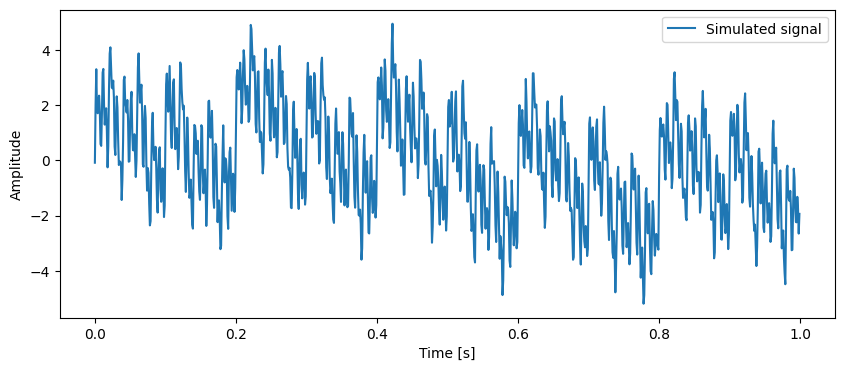

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# シミュレーションのパラメータ
num_points = 1000  # サンプル数
sampling_rate = 1000  # サンプリングレート
frequencies =  [1, 5, 10, 20, 50, 100, 200]  # 周波数（7つ）
noise_level = 0.2  # ノイズレベル

# 時間軸の生成
t = np.arange(num_points) / sampling_rate

# 各周波数のサイン波を生成
simulated_signal = np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0)

# ノイズを追加
simulated_signal += noise_level * np.random.randn(num_points)

# 時系列データをプロット
plt.figure(figsize=(10, 4))
plt.plot(t, simulated_signal, label='Simulated signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Exercise 2. Show that you can identify each signal using a FFT

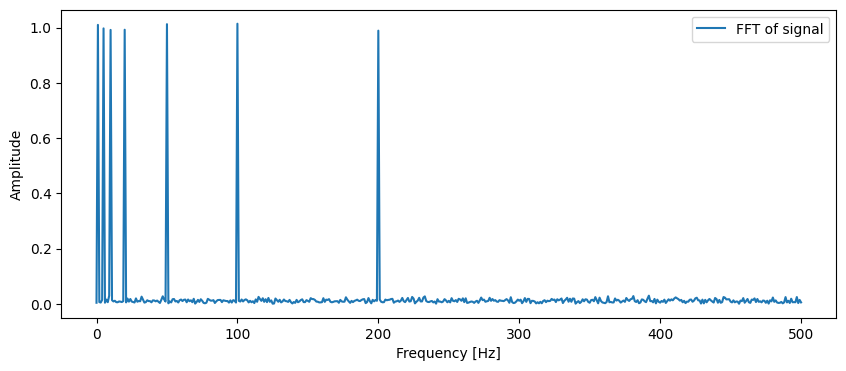

In [37]:
# FFTを実行
fft_vals = np.fft.rfft(simulated_signal)

# FFT結果を正規化
fft_vals = np.abs(fft_vals) / num_points * 2

# 頻度軸の生成
fft_freq = np.fft.rfftfreq(num_points, 1.0 / sampling_rate)

# FFT結果をプロット
plt.figure(figsize=(10, 4))
plt.plot(fft_freq, fft_vals, label='FFT of signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Exercise 3. Remove one frequency with a bandstop filter

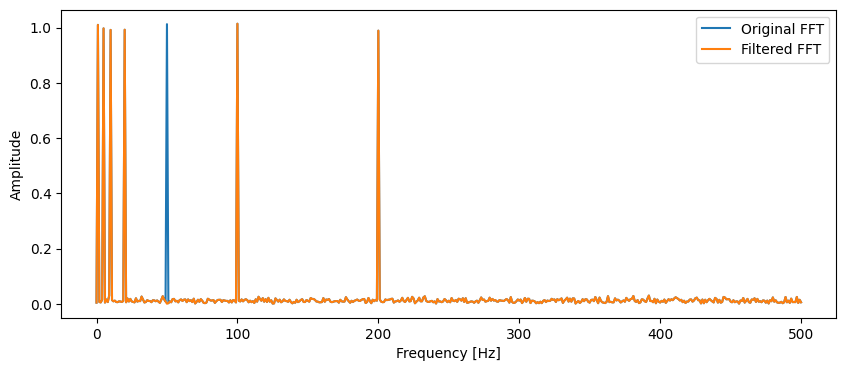

In [49]:
from scipy import signal

# バンドストップフィルタのパラメータ
freq_to_remove = 50  # 除去する周波数 [Hz]
width = 0.5  # フィルタの帯域幅 [Hz]

# FFTを実行
fft_vals = np.fft.rfft(simulated_signal)

# FFT結果を正規化
fft_vals = np.abs(fft_vals) / num_points * 2

# バンドストップフィルタを作成
bandstop_filter = np.ones_like(fft_vals)
bandstop_filter[np.abs(fft_freq - freq_to_remove) < width / 2] = 0

# フィルタを適用して信号から特定の周波数成分を除去
filtered_fft_vals = fft_vals * bandstop_filter

# FFT結果をプロット（元の信号とフィルタ適用後の信号）
plt.figure(figsize=(10, 4))
plt.plot(fft_freq, fft_vals, label='Original FFT')
plt.plot(fft_freq, filtered_fft_vals, label='Filtered FFT')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Exercise 4. Remove frequency with a bandstop filter in the frequency domain and reconstruct the signal in the time domain with the frequency removed and compare it to the original

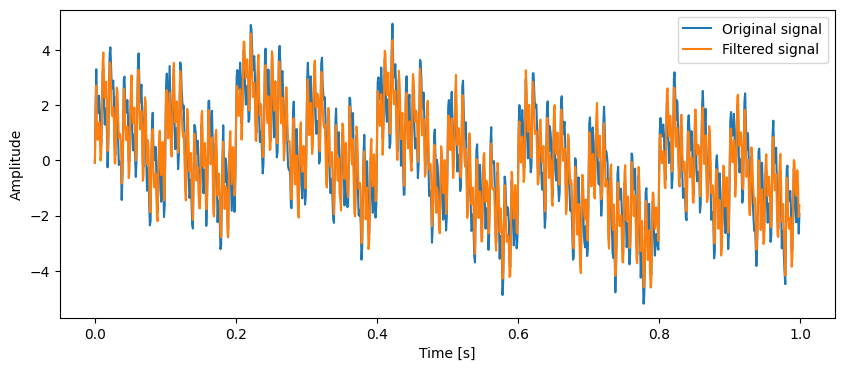

In [52]:
# FFTを実行
fft_vals = np.fft.rfft(simulated_signal)

# バンドストップフィルタを作成
bandstop_filter = np.ones_like(fft_vals)
bandstop_filter[np.abs(fft_freq - freq_to_remove) < width / 2] = 0

# フィルタを適用して信号から特定の周波数成分を除去
filtered_fft_vals = fft_vals * bandstop_filter

# 逆FFTを実行して時間領域の信号に戻す
filtered_signal = np.fft.irfft(filtered_fft_vals)

# 元の信号とフィルタリング後の信号をプロット
plt.figure(figsize=(10, 4))
plt.plot(t, simulated_signal, label='Original signal')
plt.plot(t, filtered_signal, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
